In [1]:
import sys
import os
from tensorflow.keras import backend as backend
from tensorflow.keras.utils import to_categorical
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from collections import Counter

#!cp /content/drive/MyDrive/Colab\ Notebooks/QEResearch/ches_ctf/sca_metrics.py/
#file_location = "/content/drive/MyDrive/Colab\ Notebooks/QEResearch/ches_ctf/sca_metrics.py"
#sys.path.append(os.path.abspath(file_location))
#sys.path.insert(0,'/content/drive/MyDrive/Colab\Notebooks/QEResearch/ches_ctf/')
#sys.path.append('/content/drive/MyDrive/Colab Notebooks/QEResearch/ches_ctf')
#import SCAMetrics

Mounted at /content/drive


In [2]:
#Authenticate Google Drive Access
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Linking Colab Notebook to the Module
your_module = drive.CreateFile({'id':'1E9kCFN_Qf6720hbw996x6z0xUSLqQwjg'})



In [3]:
!pip install import-ipynb
import import_ipynb

!pip install -U -q PyDrive
#your_module.GetContentFile('sca_metrics.ipynb')
#from sca_metrics import *


In [4]:
#Authenticate Google Drive Access
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Linking Colab Notebook to the Module
#your_module = drive.CreateFile({'id':'11WgfAW1xTNRX_tl74AcFCnJNh6hhjtrQ'})
your_module = drive.CreateFile({'id':'1t5viOwM1THtGwwGzxVIO1hvrroYqvGdA'})
your_module.GetContentFile('sca_metrics.py') 
import sca_metrics
from sca_metrics import SCAMetrics
#your_module.GetContentFile({'id':'16R_OCUvUjNXD3hnk_XvW0H2CR-MtbpeI'})

In [5]:
#Authenticate Google Drive Access
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Linking Colab Notebook to the Module
your_module = drive.CreateFile({'id':'13XQlHNSBzOV7jPlTvAxmC2U3G3MtQvVm'})
your_module.GetContentFile('loaddatasetimbalanced.py') #13XQlHNSBzOV7jPlTvAxmC2U3G3MtQvVm
import loaddatasetimbalanced
from loaddatasetimbalanced import LoadDatasets 

In [6]:
#Authenticate Google Drive Access
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Linking Colab Notebook to the Module
your_module = drive.CreateFile({'id':'14CorI66D0y0P-4eXCStsl90Avpb-xtUM'})
your_module.GetContentFile('datasets.py') #14CorI66D0y0P-4eXCStsl90Avpb-xtUM
import datasets
from datasets import SCADatasets 

In [7]:
#Authenticate Google Drive Access
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Linking Colab Notebook to the Module
your_module = drive.CreateFile({'id':'1-FN6v9o_gRLvKjr0Bof9rWuYCnSI7HPd'})
your_module.GetContentFile('neural_networks.py') #1-FN6v9o_gRLvKjr0Bof9rWuYCnSI7HPd
import neural_networks
from neural_networks import NeuralNetwork 

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import numpy as np
import random


class EnsembleAES:

    def __init__(self):
        self.number_of_models = 50
        self.number_of_best_models = 10
        self.ge_all_validation = []
        self.ge_all_attack = []
        self.sr_all_validation = []
        self.sr_all_attack = []
        self.k_ps_all = []
        self.ge_ensemble = None
        self.ge_ensemble_best_models = None
        self.ge_best_model_validation = None
        self.ge_best_model_attack = None
        self.sr_ensemble = None
        self.sr_ensemble_best_models = None
        self.sr_best_model_validation = None
        self.sr_best_model_attack = None
        self.target_dataset = None
        self.l_model = None
        self.target_byte = None
        self.classes = None
        self.epochs = None
        self.mini_batch = None

    def set_dataset(self, target): #function for setting up dataset - ASCAD | ches_ctf
        self.target_dataset = target

    def set_leakage_model(self, leakage_model): #function for setting up leakage model
        self.l_model = leakage_model
        if leakage_model == "HW":
            self.classes = 9
        else:
            self.classes = 256

    def set_target_byte(self, target_byte): #target byte to attack: most of the time, this is 3
        self.target_byte = target_byte

    def set_epochs(self, epochs): #we set no of epochs for our training model
        self.epochs = epochs

    def set_mini_batch(self, mini_batch): #not sure of mini_batch. I guess it means batch
        self.mini_batch = mini_batch

    def __add_if_one(self, value): #don't know when this will be useful
        return 1 if value == 1 else 0

    def get_best_models(self, n_models, result_models_validation, n_traces):
        result_number_of_traces_val = []
        for model_index in range(n_models):
            if result_models_validation[model_index][n_traces - 1] == 1:
                for index in range(n_traces - 1, -1, -1):
                    if result_models_validation[model_index][index] != 1:
                        result_number_of_traces_val.append(
                            [result_models_validation[model_index][n_traces - 1], index + 1,
                             model_index])
                        break
            else:
                result_number_of_traces_val.append(
                    [result_models_validation[model_index][n_traces - 1], n_traces,
                     model_index])

        sorted_models = sorted(result_number_of_traces_val, key=lambda l: l[:])

        list_of_best_models = []
        for model_index in range(n_models):
            list_of_best_models.append(sorted_models[model_index][2])

        return list_of_best_models

    def run_mlp(self, X_profiling, Y_profiling, X_validation, Y_validation, X_attack, Y_attack, plt_validation, plt_attack, params,
                step, fraction):
        mini_batch = random.randrange(500, 1000, 100)
        learning_rate = random.uniform(0.0001, 0.001)
        activation = ['relu', 'tanh', 'elu', 'selu'][random.randint(0, 3)]
        layers = random.randrange(2, 8, 1)
        neurons = random.randrange(500, 800, 100)

        model = NeuralNetwork().mlp_random(self.classes, params["number_of_samples"], activation, neurons, layers, learning_rate)
        model.fit(
            x=X_profiling,
            y=Y_profiling,
            batch_size=self.mini_batch,
            verbose=1,
            epochs=self.epochs,
            shuffle=True,
            validation_data=(X_validation, Y_validation),       #We train by running MLP and then we use SCA metrics to verify accuracy
            callbacks=[])
                                                                                   #this shows on the window first
        ge_validation, sr_validation, kp_krs = SCAMetrics().ge_and_sr(100, model, params, self.l_model, self.target_byte,
                                                                      X_validation, plt_validation, step, fraction)
        ge_attack, sr_attack, _ = SCAMetrics().ge_and_sr(100, model, params, self.l_model, self.target_byte, X_attack, plt_attack, step,
                                                         fraction)              #this shows on the window after

        backend.clear_session()

        return ge_validation, ge_attack, sr_validation, sr_attack, kp_krs

    def run_cnn(self, X_profiling, Y_profiling, X_validation, Y_validation, X_attack, Y_attack, plt_validation, plt_attack, params,
                step, fraction):
        X_profiling = X_profiling.reshape((X_profiling.shape[0], X_profiling.shape[1], 1))
        X_validation = X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1))
        X_attack = X_attack.reshape((X_attack.shape[0], X_attack.shape[1], 1))

        mini_batch = random.randrange(500, 1000, 100)
        learning_rate = random.uniform(0.0001, 0.001)
        activation = ['relu', 'tanh', 'elu', 'selu'][random.randint(0, 3)]
        dense_layers = random.randrange(2, 8, 1)
        neurons = random.randrange(500, 800, 100)
        conv_layers = random.randrange(1, 2, 1)
        filters = random.randrange(8, 32, 4)
        kernel_size = random.randrange(10, 20, 2)
        stride = random.randrange(5, 10, 5)

        model = NeuralNetwork().cnn_random(self.classes, params["number_of_samples"], activation, neurons, conv_layers, filters,
                                           kernel_size, stride, dense_layers, learning_rate)
        model.fit(
            x=X_profiling,
            y=Y_profiling,
            batch_size=self.mini_batch,
            verbose=1,
            epochs=self.epochs,
            shuffle=True,
            validation_data=(X_validation, Y_validation),
            callbacks=[])                                         #We train by running CNN and then we use SCA metrics to verify accuracy

        ge_validation, sr_validation, kp_krs = SCAMetrics().ge_and_sr(100, model, params, self.l_model, self.target_byte,
                                                                      X_validation, plt_validation,
                                                                      step, fraction)  #this shows on the window first
        ge_attack, sr_attack, _ = SCAMetrics().ge_and_sr(100, model, params, self.l_model, self.target_byte, X_attack, plt_attack, step,
                                                         fraction)                   #this shows on the window after

        backend.clear_session()

        return ge_validation, ge_attack, sr_validation, sr_attack, kp_krs

    def compute_ensembles(self, kr_nt, correct_key):

        list_of_best_models = self.get_best_models(self.number_of_models, self.ge_all_validation, kr_nt)

        self.ge_best_model_validation = self.ge_all_validation[list_of_best_models[0]]
        self.ge_best_model_attack = self.ge_all_attack[list_of_best_models[0]]
        self.sr_best_model_validation = self.sr_all_validation[list_of_best_models[0]]
        self.sr_best_model_attack = self.sr_all_attack[list_of_best_models[0]]

        kr_ensemble = np.zeros(kr_nt)
        krs_ensemble = np.zeros((100, kr_nt))
        kr_ensemble_best_models = np.zeros(kr_nt)
        krs_ensemble_best_models = np.zeros((100, kr_nt))

        for run in range(100):

            key_p_ensemble = np.zeros(256)
            key_p_ensemble_best_models = np.zeros(256)

            for index in range(kr_nt):
                for model_index in range(self.number_of_models):
                    key_p_ensemble += np.log(self.k_ps_all[list_of_best_models[model_index]][run][index] + 1e-36)
                for model_index in range(self.number_of_best_models):
                    key_p_ensemble_best_models += np.log(self.k_ps_all[list_of_best_models[model_index]][run][index] + 1e-36)

                key_p_ensemble_sorted = np.argsort(key_p_ensemble)[::-1]
                key_p_ensemble_best_models_sorted = np.argsort(key_p_ensemble_best_models)[::-1]

                kr_position = list(key_p_ensemble_sorted).index(correct_key) + 1
                kr_ensemble[index] += kr_position
                krs_ensemble[run][index] = kr_position

                kr_position = list(key_p_ensemble_best_models_sorted).index(correct_key) + 1
                kr_ensemble_best_models[index] += kr_position
                krs_ensemble_best_models[run][index] = kr_position

            print("Run {} - GE {} models: {} | GE {} models: {} | ".format(run, self.number_of_models,
                                                                           int(kr_ensemble[kr_nt - 1] / (run + 1)),
                                                                           self.number_of_best_models,
                                                                           int(kr_ensemble_best_models[kr_nt - 1] / (run + 1))))

        ge_ensemble = kr_ensemble / 100
        ge_ensemble_best_models = kr_ensemble_best_models / 100

        sr_ensemble = np.zeros(kr_nt)
        sr_ensemble_best_models = np.zeros(kr_nt)

        for index in range(kr_nt):
            for run in range(100):
                sr_ensemble[index] += self.__add_if_one(krs_ensemble[run][index])
                sr_ensemble_best_models[index] += self.__add_if_one(krs_ensemble_best_models[run][index])

        return ge_ensemble, ge_ensemble_best_models, sr_ensemble/100, sr_ensemble_best_models/100

    def create_z_score_norm(self, dataset):
        z_score_mean = np.mean(dataset, axis=0)
        z_score_std = np.std(dataset, axis=0)
        return z_score_mean, z_score_std

    def apply_z_score_norm(self, dataset, z_score_mean, z_score_std):
        for index in range(len(dataset)):
            dataset[index] = (dataset[index] - z_score_mean) / z_score_std

    def run_ensemble(self, number_of_models, number_of_best_models):

        self.number_of_models = number_of_models
        self.number_of_best_models = number_of_best_models

        target_params = SCADatasets().get_trace_set(self.target_dataset)

        #root_folder = "D:/traces/"
        #root_folder = '/content/drive/MyDrive/Colab Notebooks/QEResearch/ches_ctf/'
        root_folder = '/content/gdrive/MyDrive/QEResearch/ches_ctf/'


        (X_profiling, Y_profiling), (X_validation, Y_validation), (X_attack, Y_attack), ( #go into load_dataset class: apply imbalance
            _, plt_validation, plt_attack) = LoadDatasets().load_dataset(
            root_folder + target_params["file"], target_params["n_profiling"], target_params["n_attack"], self.target_byte, self.l_model)
        print('loaded')

         #measure imbalance of the data here
        oversample = SMOTE()          #added
        X_profilinga, Y_profilinga = oversample.fit_resample(X_profiling, Y_profiling)  #added
        # summarize distribution
        counter = Counter(Y_profilinga)      #added switch betweenn Y_profiling & Y_profilinga
        for k,v in counter.items():   #added
          per = v / len(Y_profilinga) * 100   #added
          print('Class=%d, n=%d (%.3f%%)' % (k, v, per))  #added
        # plot the distribution
        plt.bar(counter.keys(), counter.values())    #added
        #plt.subplot(1, 2, 1)
        #plt.plot(ensemble_aes.get_ge_best_model_validation(), )
        plt.xlabel("Classes")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()   #added

        


        # normalize with z-score
        z_score_mean, z_score_std = self.create_z_score_norm(X_profiling)
        self.apply_z_score_norm(X_profiling, z_score_mean, z_score_std)
        self.apply_z_score_norm(X_validation, z_score_mean, z_score_std)
        self.apply_z_score_norm(X_attack, z_score_mean, z_score_std)

        # convert labels to categorical labels
        Y_profiling = to_categorical(Y_profiling, num_classes=self.classes)
        Y_validation = to_categorical(Y_validation, num_classes=self.classes)
        Y_attack = to_categorical(Y_attack, num_classes=self.classes)

        X_profiling = X_profiling.astype('float32')
        X_validation = X_validation.astype('float32')
        X_attack = X_attack.astype('float32')

        kr_step = 10  # key rank processed for each kr_step traces
        kr_fraction = 1  # validation or attack sets are divided by kr_fraction before computing key rank

        self.ge_all_validation = []
        self.sr_all_validation = []
        self.ge_all_attack = []
        self.k_ps_all = []

        kr_nt = int(len(X_validation) / (kr_step * kr_fraction))

        # train random MLP
        for model_index in range(self.number_of_models):
            ge_validation, ge_attack, sr_validation, sr_attack, kp_krs = self.run_mlp(X_profiling, Y_profiling,
                                                                                      X_validation, Y_validation,
                                                                                      X_attack, Y_attack,
                                                                                      plt_validation, plt_attack,
                                                                                      target_params, kr_step, kr_fraction)
            self.ge_all_validation.append(ge_validation)
            self.ge_all_attack.append(ge_attack)
            self.sr_all_validation.append(sr_validation)
            self.sr_all_attack.append(sr_attack)
            self.k_ps_all.append(kp_krs)

        # train random CNN
        # for model_index in range(self.number_of_models):
        #     ge_validation, ge_attack, sr_validation, sr_attack, kp_krs = self.run_cnn(X_profiling, Y_profiling,
        #                                                                               X_validation, Y_validation,
        #                                                                               X_attack, Y_attack,
        #                                                                               plt_validation, plt_attack,
        #                                                                               target_params, kr_step, kr_fraction)
        #     self.ge_all_validation.append(ge_validation)
        #     self.ge_all_attack.append(ge_attack)
        #     self.sr_all_validation.append(sr_validation)
        #     self.sr_all_attack.append(sr_attack)
        #     self.k_ps_all.append(kp_krs)

        ge_ensemble, ge_ensemble_best_models, sr_ensemble, sr_ensemble_best_models = self.compute_ensembles(kr_nt,
                                                                                                            target_params["good_key"])

        self.ge_ensemble = ge_ensemble
        self.ge_ensemble_best_models = ge_ensemble_best_models
        self.sr_ensemble = sr_ensemble
        self.sr_ensemble_best_models = sr_ensemble_best_models

    def get_ge_ensemble(self):
        return self.ge_ensemble

    def get_ge_ensemble_best_models(self):
        return self.ge_ensemble_best_models

    def get_ge_best_model_validation(self):
        return self.ge_best_model_validation

    def get_ge_best_model_attack(self):
        return self.ge_best_model_attack

    def get_sr_ensemble(self):
        return self.sr_ensemble

    def get_sr_ensemble_best_models(self):
        return self.sr_ensemble_best_models

    def get_sr_best_model_validation(self):
        return self.sr_best_model_validation

    def get_sr_best_model_attack(self):
        return self.sr_best_model_attack

loaded


No handles with labels found to put in legend.


Class=5, n=12294 (11.111%)
Class=4, n=12294 (11.111%)
Class=6, n=12294 (11.111%)
Class=3, n=12294 (11.111%)
Class=7, n=12294 (11.111%)
Class=1, n=12294 (11.111%)
Class=2, n=12294 (11.111%)
Class=0, n=12294 (11.111%)
Class=8, n=12294 (11.111%)


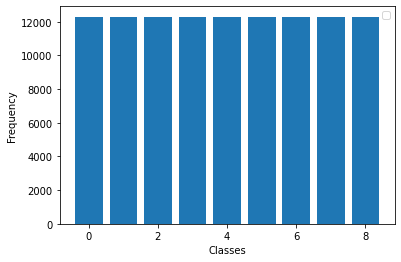

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 2200)             8800      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 600)               1320600   
                                                                 
 dense_1 (Dense)             (None, 600)               360600    
                                                                 
 dense_2 (Dense)             (None, 600)               360600    
                                                                 
 dense_3 (Dense)             (None, 600)               360600    
                                                                 
 gaussian_noise (GaussianNoi  (None, 600)              0         
 se)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Streaming output truncated to the last 5000 lines.
KR: 10 | GE for correct key (46): 1.0)
KR: 11 | GE for correct key (46): 1.0)
KR: 12 | GE for correct key (46): 1.0)
KR: 13 | GE for correct key (46): 1.0)
KR: 14 | GE for correct key (46): 1.0)
KR: 15 | GE for correct key (46): 1.0)
KR: 16 | GE for correct key (46): 1.0)
KR: 17 | GE for correct key (46): 1.0)
KR: 18 | GE for correct key (46): 1.0)
KR: 19 | GE for correct key (46): 1.0)
KR: 20 | GE for correct key (46): 1.0)
KR: 21 | GE for correct key (46): 1.0)
KR: 22 | GE for correct key (46): 1.0)
KR: 23 | GE for correct key (46): 1.0)
KR: 24 | GE for correct key (46): 1.0)
KR: 25 | GE for correct key (46): 1.0)
KR: 26 | GE for correct key (46): 1.0)
KR: 27 | GE for correct key (46): 1.0)
KR: 28 | GE for correct key (46): 1.0)
KR: 29 | GE for correct key (46): 1.0)
KR: 30 | GE for correct key (46): 1.0)
KR: 31 | GE for correct key (46): 1.0)
KR: 32 | GE for correct key (46): 1.0)
KR: 33 | GE for correct key (46): 1.0)
KR: 34 | GE f

TypeError: ignored

In [10]:
ensemble_aes = EnsembleAES()
ensemble_aes.set_dataset("ches_ctf")  # "ascad_fixed_key", "ascad_random_key" or "ches_ctf"
#ensemble_aes.set_dataset("ascad_fixed_key")  #changed from ches_ctf
ensemble_aes.set_leakage_model("HW")
ensemble_aes.set_target_byte(0)
ensemble_aes.set_mini_batch(400)
ensemble_aes.set_epochs(10)
#ensemble_aes.run_ensemble(number_of_models=5, number_of_best_models=[1,2,3,4])
ensemble_aes.run_ensemble(number_of_models=50, number_of_best_models=[1,5,10,20])

In [ ]:
plt.rc('figure', figsize=(15, 8))

# plotting GE and SR
plt.subplot(1, 2, 1)
#plt.plot(ensemble_aes.get_ge_best_model_validation(), label="GE best validation")
#plt.plot(ensemble_aes.get_ge_best_model_attack(), label="GE best attack")
plt.plot(ensemble_aes.get_ge_ensemble(), label="GE Ensemble All Models (50)")
plt.plot(ensemble_aes.get_ge_ensemble_best_models(), label="GE Ensemble Best Models (1)")
plt.plot(ensemble_aes.get_ge_ensemble_best_models1(), label="GE Ensemble Best Models1 (5)")
plt.plot(ensemble_aes.get_ge_ensemble_best_models2(), label="GE Ensemble Best Models2 (10)")
plt.plot(ensemble_aes.get_ge_ensemble_best_models3(), label="GE Ensemble Best Models3 (20)")

plt.xlabel("Traces")
plt.ylabel("Guessing Entropy")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
#plt.plot(ensemble_aes.get_sr_best_model_validation(), label="SR best validation")
#plt.plot(ensemble_aes.get_sr_best_model_attack(), label="SR best attack")
plt.plot(ensemble_aes.get_sr_ensemble(), label="SR Ensemble All Models (50)")
plt.plot(ensemble_aes.get_sr_ensemble_best_models(), label="SR Ensemble Best Models (1)")
plt.plot(ensemble_aes.get_sr_ensemble_best_models1(), label="SR Ensemble Best Models1 (5)")
plt.plot(ensemble_aes.get_sr_ensemble_best_models2(), label="SR Ensemble Best Models2 (10)")
plt.plot(ensemble_aes.get_sr_ensemble_best_models3(), label="SR Ensemble Best Models3 (20)")
plt.xlabel("Traces")
plt.ylabel("Success Rate")
plt.legend()
plt.grid()
#plt.show()
plt.savefig('MLP_ASCAD_Ensembles_Tuning.png')
plt.savefig('MLP_ASCAD_Ensembles_Tuning.pdf')

loaded


No handles with labels found to put in legend.


Class=5, n=13554 (11.111%)
Class=6, n=13554 (11.111%)
Class=4, n=13554 (11.111%)
Class=1, n=13554 (11.111%)
Class=3, n=13554 (11.111%)
Class=7, n=13554 (11.111%)
Class=2, n=13554 (11.111%)
Class=0, n=13554 (11.111%)
Class=8, n=13554 (11.111%)


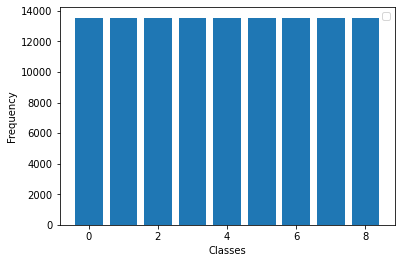

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Batc  (None, 700)              2800      
 hNormalization)                                                 
                                                                 
 dense_39 (Dense)            (None, 500)               350500    
                                                                 
 dense_40 (Dense)            (None, 500)               250500    
                                                                 
 dense_41 (Dense)            (None, 9)                 4509      
                                                                 
Total params: 608,309
Trainable params: 606,909
Non-trainable params: 1,400
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


125/125 [==============================] - 2s 15ms/step - loss: 1.9165 - accuracy: 0.2304 - val_loss: 1.8311 - val_accuracy: 0.2550
Epoch 2/10
125/125 [==============================] - 1s 10ms/step - loss: 1.8026 - accuracy: 0.2582 - val_loss: 1.8336 - val_accuracy: 0.2410
Epoch 3/10
125/125 [==============================] - 1s 10ms/step - loss: 1.7755 - accuracy: 0.2715 - val_loss: 1.8118 - val_accuracy: 0.2572
Epoch 4/10
 22/125 [====>.........................] - ETA: 1s - loss: 1.7575 - accuracy: 0.2875

KeyboardInterrupt: ignored

In [ ]:
ensemble_aes = EnsembleAES()
ensemble_aes.set_dataset("ascad_fixed_key")  # "ascad_fixed_key", "ascad_random_key" or "ches_ctf"
ensemble_aes.set_leakage_model("HW")
ensemble_aes.set_target_byte(0)
ensemble_aes.set_mini_batch(400)
ensemble_aes.set_epochs(10)
ensemble_aes.run_ensemble(number_of_models=1, number_of_best_models=1)


In [ ]:
ensemble_aes = EnsembleAES()
ensemble_aes.set_dataset("ches_ctf")  # "ascad_fixed_key", "ascad_random_key" or "ches_ctf"
ensemble_aes.set_leakage_model("HW")
ensemble_aes.set_target_byte(0)
ensemble_aes.set_mini_batch(400)
ensemble_aes.set_epochs(10)
ensemble_aes.run_ensemble(number_of_models=50, number_of_best_models=10)

# plotting GE and SR
plt.subplot(1, 2, 1)
plt.plot(ensemble_aes.get_ge_best_model_validation(), label="GE best validation")
plt.plot(ensemble_aes.get_ge_best_model_attack(), label="GE best attack")
plt.plot(ensemble_aes.get_ge_ensemble(), label="GE Ensemble All Models")
plt.plot(ensemble_aes.get_ge_ensemble_best_models(), label="GE Ensemble Best Models")
plt.xlabel("Traces")
plt.ylabel("Guessing Entropy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(ensemble_aes.get_sr_best_model_validation(), label="SR best validation")
plt.plot(ensemble_aes.get_sr_best_model_attack(), label="SR best attack")
plt.plot(ensemble_aes.get_sr_ensemble(), label="SR Ensemble All Models")
plt.plot(ensemble_aes.get_sr_ensemble_best_models(), label="SR Ensemble Best Models")
plt.xlabel("Traces")
plt.ylabel("Success Rate")
plt.legend()
plt.show()

loaded


NameError: ignored